In [77]:
import pandas as pd
import seaborn as sns

In [78]:
df = pd.read_csv("iris-data.csv")

In [79]:
df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [80]:
df.min()

sepal_length_cm          0.055
sepal_width_cm               2
petal_length_cm              1
petal_width_cm             0.1
class              Iris-setosa
dtype: object

In [81]:
df.max()

sepal_length_cm           7.9
sepal_width_cm            4.4
petal_length_cm           6.9
petal_width_cm            2.5
class              versicolor
dtype: object

In [82]:
df.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,0.066091,0.489083,0.469734
sepal_width_cm,0.066091,1.000000,-0.419796,-0.348464
petal_length_cm,0.489083,-0.419796,1.000000,0.958934
petal_width_cm,0.469734,-0.348464,0.958934,1.000000


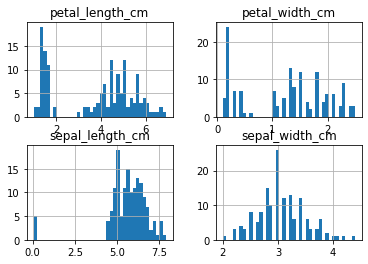

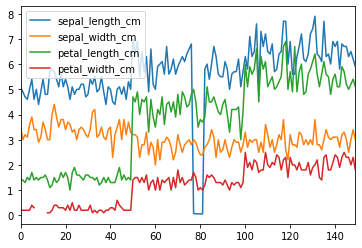

In [83]:
df.hist(bins=40)
df.plot()
#from this I would argue that while for petal length and width we don't have outliers that might bias our results
#and that we want to eliminate
#for sepal length, however, I would argue that there definitely an outlier we want to exclude
#lets check the boxplots to verify our findings

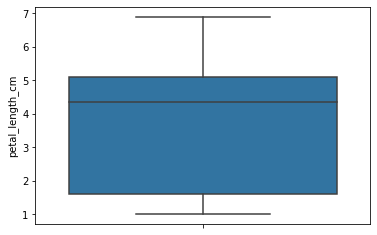

In [84]:
sns.boxplot(y=df["petal_length_cm"])
#easiest way to create a boxplot: 
#sns.boxplot(x=,y=)
#if only want y just give y
# --> sns.boxplot(x=df["petal_width_cm"], y=df["petal_length_cm"])
#Alernative:
#sns.boxplot(x='diagnosis', y='area_mean', data=df)

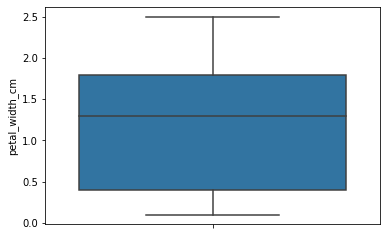

In [85]:
sns.boxplot(y=df["petal_width_cm"])

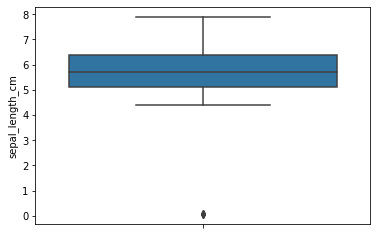

In [86]:
sns.boxplot(y=df["sepal_length_cm"])
#there seems to be outliers around sepal_length=0

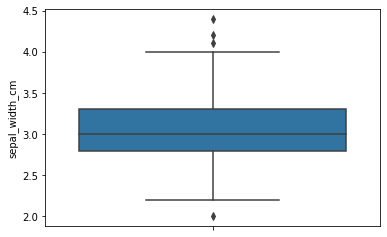

In [87]:
sns.boxplot(y=df["sepal_width_cm"])

In [88]:
#lets have a look at our outliers more specifically
df[df["sepal_length_cm"]<4].head(10)
#the question is if these outliers should be excluded or not

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [89]:
df[df["class"]=="Iris-versicolor"].mean()
#I think, there might me a comma error here and the 5 outliers below are in meters
#however, as I don't know for sure, I will rather drop these 5 rows than potentially change them to false values

sepal_length_cm    5.317644
sepal_width_cm     2.766667
petal_length_cm    4.293333
petal_width_cm     1.335556
dtype: float64

In [90]:
df = df[df["sepal_length_cm"]>4]

In [91]:
df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [92]:
#now lets check for duplicates
df["is_duplicate"]= df.duplicated()

/Users/reneraube/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
df["is_duplicate"].value_counts()

False    143
True       2
Name: is_duplicate, dtype: int64

In [94]:
df[df["is_duplicate"]==True]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,is_duplicate
37,4.9,3.1,1.5,0.1,Iris-setosa,True
142,5.8,2.7,5.1,1.9,Iris-virginica,True


In [95]:
#just havong a look at the duplicates
df[df["sepal_length_cm"]==4.9].head(10)
#as we can see, there are actually many very similair rows. The duplicates might be just a coincidence

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,is_duplicate
1,4.9,3.0,1.4,0.2,Iris-setosa,False
9,4.9,3.1,1.5,NaN,Iris-setosa,False
34,4.9,3.1,1.5,0.1,Iris-setosa,False
37,4.9,3.1,1.5,0.1,Iris-setosa,True
57,4.9,2.4,3.3,1.0,Iris-versicolor,False
106,4.9,2.5,4.5,1.7,Iris-virginica,False


In [96]:
df[df["sepal_length_cm"]==5.8].head(10)
#however looking at the second example we see that while it is possible that this is a coincidence, it is rather 
#unlikely. Therefore, let's eliminate them

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,is_duplicate
14,5.8,4.0,1.2,0.2,Iris-setosa,False
67,5.8,2.7,4.1,1.0,Iris-versicolor,False
82,5.8,2.7,3.9,1.2,Iris-versicolor,False
92,5.8,2.6,4.0,1.2,Iris-versicolor,False
101,5.8,2.7,5.1,1.9,Iris-virginica,False
114,5.8,2.8,5.1,2.4,Iris-virginica,False
142,5.8,2.7,5.1,1.9,Iris-virginica,True


In [97]:
#drop is_dupliacte column
df = df.drop("is_duplicate", axis=1)

In [98]:
df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [99]:
df = df.drop_duplicates(keep="first", inplace=False)

In [100]:
df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [101]:
df["class"].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [102]:
df[df["class"]=="Iris-setossa"]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
18,5.7,3.8,1.7,0.3,Iris-setossa


In [103]:
df.loc[df['class'] == "Iris-setossa", ['class']] = 'Iris-setosa'

/Users/reneraube/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [104]:
#not sure, but I think I have to change "versicolor" to "Iris-versicolor" this one here as well
df[df["class"]=="versicolor"]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor
99,5.7,2.8,4.1,1.3,versicolor


In [105]:
df.loc[df['class'] == "versicolor", ['class']] = 'Iris-versicolor'

In [106]:
df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [110]:
df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


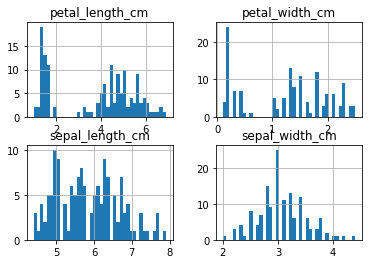

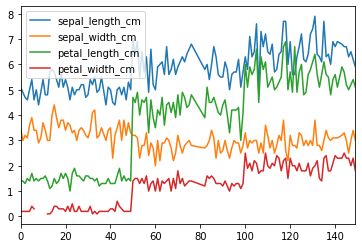

In [112]:
#checking if everything looks good now
df.hist(bins=40)
df.plot()

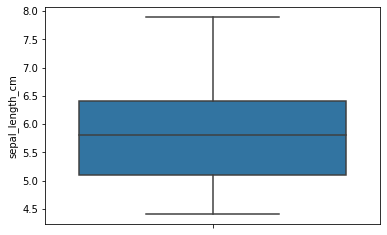

In [113]:
sns.boxplot(y=df["sepal_length_cm"])

In [109]:
#looks good. Will export it to csv
df.to_csv("Iris_Data_New.csv", index=False)